In [19]:
%matplotlib inline
import numpy as np

import utils; reload(utils)
from utils import plots
from matplotlib import pyplot as plt 

#### Download the MNIST dataset

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Print some of the data

(60000, 28, 28)


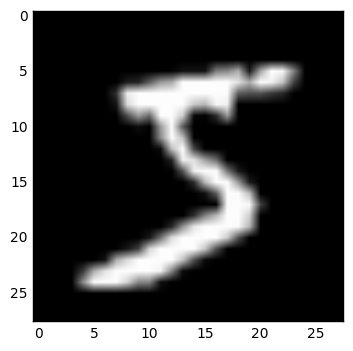

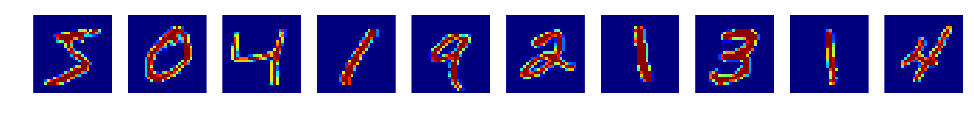

In [7]:
# Data shape
print(x_train.shape)

# show raw pixels
plt.imshow(x_train[0], cmap='gray')

# plot the first 10 images
plots(x_train[:10])

#### Prepare data for VGG like computations.

First we need to add a color channel to all images.

(60000, 1, 28, 28)


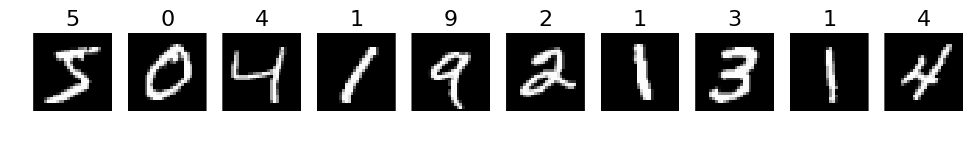

In [103]:
X = np.expand_dims(x_train, 1)
print(X.shape)

X_val = np.expand_dims(x_test, 1)

plots(X[:10], titles=y_train[:10])

Then we need to change the labels to one_hot_encodings

In [60]:
def one_hot_encoded(_y):
    max_class = np.max(_y)
    one_hot = np.zeros((_y.shape[0], max_class+1), dtype=np.float)
    for i, clazz in enumerate(_y):
        one_hot[i][clazz] = 1
    return one_hot

y_ = one_hot_encoded(y_train)
print(y_train[:10])
print(y_[:10])

[5 0 4 1 9 2 1 3 1 4]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


The same effect can be obtain by using the keras function bellow

In [104]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y_train)
y_val = to_categorical(y_test)

assert np.allclose(y, y_)

We should also normalize the inputs by substracting the mean and dividing by the standard_deviation. The mean and std should be computed on all the features at once, because the goal is to make all the features be on the same order of magnitude (so that the training converges faster).

In [98]:
x_mean = np.mean(X).astype(np.float)
x_std = np.std(X).astype(np.float)

def normalize_input(X):
    return (X - x_mean) / x_std


#### Build a first really simple model, a linear regressor

In [106]:
from keras.models import Sequential
from keras.layers.core import Lambda

from keras.layers import Dense, InputLayer, Flatten
from keras.optimizers import Adam

model = Sequential([
        Lambda(normalize_input, input_shape=(1, 28, 28)),
        Flatten(),
        Dense(10, activation='softmax')
    ])

model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, nb_epoch=10, validation_data=(X_val, y_val))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.3911 - acc: 0.8854 - val_loss: 0.2899 - val_acc: 0.9159
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.2993 - acc: 0.9153 - val_loss: 0.2902 - val_acc: 0.9158
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.2881 - acc: 0.9190 - val_loss: 0.2794 - val_acc: 0.9243
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.2801 - acc: 0.9215 - val_loss: 0.2932 - val_acc: 0.9185
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.2774 - acc: 0.9227 - val_loss: 0.2764 - val_acc: 0.9235
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.2742 - acc: 0.9244 - val_loss: 0.2835 - val_acc: 0.9210
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.2715 - acc: 0.9250 - val_loss: 0.2967 - val_acc: 0.9173
Epoch 8/10
60000/60000 [==============================] - 3s 

#### A model with one hidden layer

In [107]:
model = Sequential([
        Lambda(normalize_input, input_shape=(1, 28, 28)),
        Flatten(),
        Dense(100, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])

model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, validation_data=(X_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s - loss: 0.3240 - acc: 0.9119 - val_loss: 0.1898 - val_acc: 0.9435
Epoch 2/10
60000/60000 [==============================] - 6s - loss: 0.1578 - acc: 0.9546 - val_loss: 0.1424 - val_acc: 0.9582
Epoch 3/10
60000/60000 [==============================] - 6s - loss: 0.1139 - acc: 0.9677 - val_loss: 0.1162 - val_acc: 0.9660
Epoch 4/10
60000/60000 [==============================] - 6s - loss: 0.0883 - acc: 0.9752 - val_loss: 0.1031 - val_acc: 0.9690
Epoch 5/10
60000/60000 [==============================] - 6s - loss: 0.0715 - acc: 0.9797 - val_loss: 0.1037 - val_acc: 0.9694
Epoch 6/10
60000/60000 [==============================] - 6s - loss: 0.0594 - acc: 0.9838 - val_loss: 0.0867 - val_acc: 0.9737
Epoch 7/10
60000/60000 [==============================] - 6s - loss: 0.0500 - acc: 0.9859 - val_loss: 0.0889 - val_acc: 0.9726
Epoch 8/10
60000/60000 [==============================] - 6s 

#### A model with convolutions

In [111]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

model = Sequential([
        Lambda(normalize_input, input_shape=(1, 28, 28)),
        Convolution2D(7, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(7, 3, 3, activation='relu', border_mode='same'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='tf'),
        Convolution2D(14, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(14, 3, 3, activation='relu', border_mode='same'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='tf'),
        Convolution2D(28, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(28, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(28, 3, 3, activation='relu', border_mode='same'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='tf'),
        Convolution2D(56, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(56, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(56, 3, 3, activation='relu', border_mode='same'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='tf'),
        Flatten(),
        Dense(100, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])

model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, validation_data=(X_val, y_val), nb_epoch=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 570s - loss: 0.2619 - acc: 0.9223 - val_loss: 0.1007 - val_acc: 0.9684


#### Do some training data augmentation

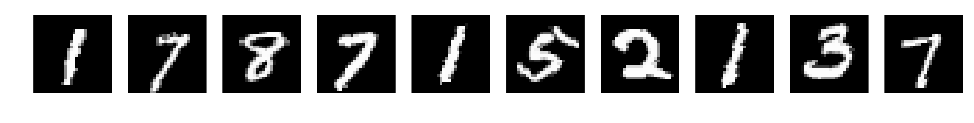

In [146]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, shear_range=0.1, dim_ordering='th')
batch_gen = gen.flow(X, y)
img, _ = next(batch_gen)
plots(img[:10])

In [131]:
model.optimizer.lr=0.001
model.fit_generator(batch_gen, batch_gen.n, nb_epoch=1, validation_data=(X_val, y_val))

Epoch 1/1
60000/60000 [==============================] - 573s - loss: 0.1227 - acc: 0.9621 - val_loss: 0.1090 - val_acc: 0.9633


Add Dropout for better regularization

In [163]:
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

model = Sequential([
        Lambda(normalize_input, input_shape=(1, 28, 28)),
        Convolution2D(10, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(10, 3, 3, activation='relu', border_mode='same'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='th'),
        Convolution2D(20, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(20, 3, 3, activation='relu', border_mode='same'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='th'),
        Convolution2D(40, 3, 3, activation='relu', border_mode='same'),
        Convolution2D(40, 3, 3, activation='relu', border_mode='same'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='th'),
        Flatten(),
        Dense(400, activation='relu'),
        Dropout(0.5),
        Dense(400, activation='relu'),
        Dropout(0.6),
        Dense(10, activation='softmax')
    ])

model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit_generator(batch_gen, batch_gen.n, nb_epoch=1, validation_data=(X_val, y_val))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_38 (Lambda)               (None, 1, 28, 28)     0           lambda_input_37[0][0]            
____________________________________________________________________________________________________
convolution2d_269 (Convolution2D (None, 10, 28, 28)    100         lambda_38[0][0]                  
____________________________________________________________________________________________________
convolution2d_270 (Convolution2D (None, 10, 28, 28)    910         convolution2d_269[0][0]          
____________________________________________________________________________________________________
maxpooling2d_106 (MaxPooling2D)  (None, 10, 14, 14)    0           convolution2d_270[0][0]          
___________________________________________________________________________________________

Adding the batch normalisation

In [166]:
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential([
        Lambda(normalize_input, input_shape=(1, 28, 28)),
        Convolution2D(10, 3, 3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(10, 3, 3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='th'),
        Convolution2D(20, 3, 3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(20, 3, 3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='th'),
        Convolution2D(40, 3, 3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(40, 3, 3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), dim_ordering='th'),
        Flatten(),
        Dense(400, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(400, activation='relu'),
        BatchNormalization(),
        Dropout(0.6),
        Dense(10, activation='softmax')
    ])

model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit_generator(batch_gen, batch_gen.n, nb_epoch=1, validation_data=(X_val, y_val))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_41 (Lambda)               (None, 1, 28, 28)     0           lambda_input_40[0][0]            
____________________________________________________________________________________________________
convolution2d_287 (Convolution2D (None, 10, 28, 28)    100         lambda_41[0][0]                  
____________________________________________________________________________________________________
batchnormalization_17 (BatchNorm (None, 10, 28, 28)    40          convolution2d_287[0][0]          
____________________________________________________________________________________________________
convolution2d_288 (Convolution2D (None, 10, 28, 28)    910         batchnormalization_17[0][0]      
___________________________________________________________________________________________

In [169]:
model.optimizer.lr=0.0001
model.fit_generator(batch_gen, batch_gen.n, nb_epoch=1, validation_data=(X_val, y_val))

Epoch 1/1
60000/60000 [==============================] - 830s - loss: 0.0785 - acc: 0.9768 - val_loss: 0.0243 - val_acc: 0.9917


### Other experiments with preprocessing input data

Adding all three color chanels

In [ ]:
# Add two new color channels (for g, b set to 0) that we are going to expand the array on the 1 axis
colors = np.zeros((X.shape[0], 2, X.shape[2], X.shape[3]))
print(colors.shape)

X = np.append(X, colors, axis=1)
print(X.shape)

plots(X[:10])

Experiment with the numpy roll function. I makes take on axis and puts it into the specified final position (start=)

(3, 1, 28, 28)
(3, 28, 1, 28)
(3, 28, 28, 1)
(28, 28, 3, 1)
(1, 28, 28, 3)


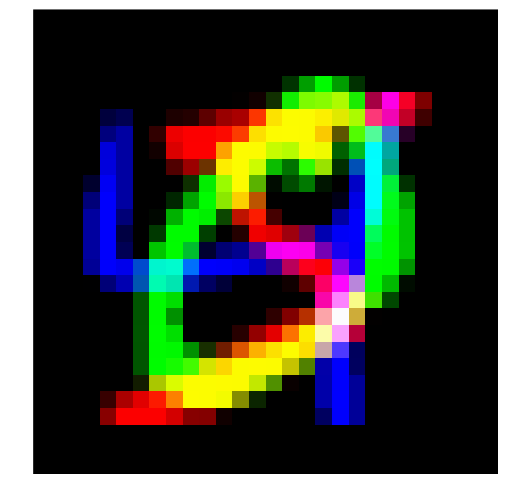

In [30]:
x = X[:3]
print(x.shape)

x = np.rollaxis(x, 2, 1) # get second axis and put into the first axis
print(x.shape)

x = np.rollaxis(x, 3, 2) # get fourth axis(index is 3) and put it onto the third axis (index is 2) 
print(x.shape)

# TODO: Merging the three examples into the color channels axis: 
#  - we need the 3 to be the last axis
#  - we need the 1 to ne the first axis (one final image)

x = np.rollaxis(x, 0, 3) # get fourth axis(index is 3) and put it onto the third axis (index is 2) 
print(x.shape)

x = np.rollaxis(x, 3, 0) # get fourth axis(index is 3) and put it onto the third axis (index is 2) 
print(x.shape)

# if we print now the image, we should see the three numbers initialy selected, merged into one
# each on a different channel (one on the red, one on the green, one on the blue)
plots(x)